<h2>Code-Beispiel: Merkmalsdetektion</h2>
<font size="3" face="Verdana">
<p style="text-align:justify">Im folgenden befindet sich eine interaktive Anwendung zur Veranschaulichung der Merkmalsdetektion mittels FAST.</p>
<p style="text-align:justify">Dazu muss jedoch zuerst in den nachstehenden Code-Block geklickt werden und dieser durch drücken der "Run" Taste in der Leiste oben ausgeführt werden. Darunter erscheinen dann Bilder in denen rote Punkte jeweils den untersuchten Pixel kennzeichnen. Mit den Schiebereglern kann die Anzahl der zusammenhängenden Pixel n und der Schwellwert t eingestellt werden.</p> 
</font>



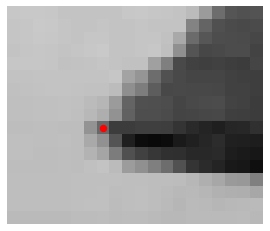

interactive(children=(IntSlider(value=12, description='n (aneinanderhängende Pixel)', layout=Layout(height='50…

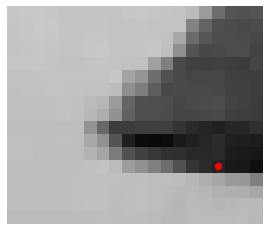

interactive(children=(IntSlider(value=12, description='n (aneinanderhängende Pixel)', layout=Layout(height='50…

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import HBox, Label


# speichere die Pixel im Kreis um den betrachteten Pixel
def get_circle(img, x, y):
    pixels = np.zeros(16)
    pixels[0] = img[y-3, x]
    pixels[1] = img[y-3, x+1]
    pixels[2] = img[y-2, x+2]
    pixels[3] = img[y-1, x+3]
    pixels[4] = img[y, x+3]
    pixels[5] = img[y+1, x+3]
    pixels[6] = img[y+2, x+2]
    pixels[7] = img[y+3, x+1]
    pixels[8] = img[y+3, x]
    pixels[9] = img[y+3, x-1]
    pixels[10] = img[y+2, x-2]
    pixels[11] = img[y+1, x-3]
    pixels[12] = img[y, x-3]
    pixels[13] = img[y-1, x-3]
    pixels[14] = img[y-2, x-2]
    pixels[15] = img[y-3, x-1]
    return pixels
    

def FAST(img, n, t, x, y):
    pixels = get_circle(img,x,y)
    test_pixel = np.array([1, 9, 5, 13])
    
    #Berechne wie viele der Test-Pixel sich deutlich vom betrachteten Pixel unterscheiden
    num = 0
    for i in range(4):
        if pixels[test_pixel[i]] < img[y,x] - t or pixels[test_pixel[i]] > img[y,x] + t:
            num = num+1
            
    #Wenn mindestens 3 der Testpixel sich unterscheiden, betrachte alle
    result = []
    for i in range(16):
        if pixels[i] < img[y,x] - t or pixels[i] > img[y,x] + t:
            result.append(1)
        else:
            result.append(0)
    
    #Ergebnis zwei mal hintereinander
    resultresult = result
    for i in range(16):
        resultresult.append(result[i])
    
    #Teste ob mindestens n mal hintereinander ein Unterschied auftrat
    num = 0
    gefunden = False
    for i in range(32):
        if resultresult[i] == 1:
            num = num+1
            if num == n:
                print("Eckpunkt gefunden!!!")
                gefunden = True
                break
        else:
            num = 0
    if not gefunden:
        print("Kein Eckpunkt!!!")


#read image as grayscale and display it
img = plt.imread('FAST_bsp1.png')
img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

plt.scatter(x=[7], y=[9], c='r', s=40)
plt.axis("off")
plt.show()

style = {'description_width': 'initial'}
layout = widgets.Layout( width='500px', height='50px')
interact(FAST, img=fixed(img), n=widgets.IntSlider(min=1, max=16, step=1, value=12, description='n (aneinanderhängende Pixel)', layout=layout, style=style), t=widgets.FloatSlider(min=0.0, max=1.0, step=.01, value=0, description='t (Schwellwert)', layout=layout, style=style), x=fixed(7), y=fixed(9));


img = plt.imread('FAST_bsp1.png')
img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(img, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

plt.scatter(x=[16], y=[12], c='r', s=40)
plt.axis("off")
plt.show()

style = {'description_width': 'initial'}
layout = widgets.Layout( width='500px', height='50px')
interact(FAST, img=fixed(img), n=widgets.IntSlider(min=1, max=16, step=1, value=12, description='n (aneinanderhängende Pixel)', layout=layout, style=style), t=widgets.FloatSlider(min=0.0, max=1.0, step=.01, value=0, description='t (Schwellwert)', layout=layout, style=style), x=fixed(16), y=fixed(12));


